In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set()

In [2]:
def generate_datasets(size=100000):

    x = np.random.uniform(size=size)
    y = np.random.uniform(size=size)

    c_a = np.sin(6 * x) / 6 + 0.6 > y

    sns.scatterplot(x, y, hue=c_a)
    plt.show()

    c_b = np.floor((x * 10) / 2.5) % 2 == np.floor((y * 10) / 2.5) % 2

    sns.scatterplot(x, y, hue=c_b)
    plt.show()

    return x, y, c_a, c_b

# Генерирање на синтетички множества за А и Б

Генерирам по 5 случајни множества

5010


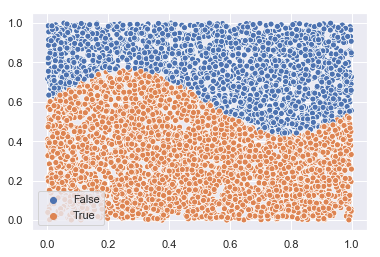

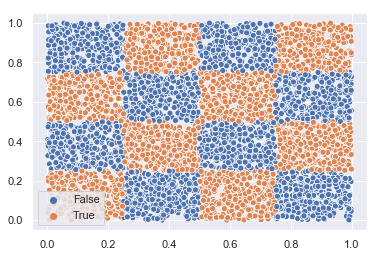

1389


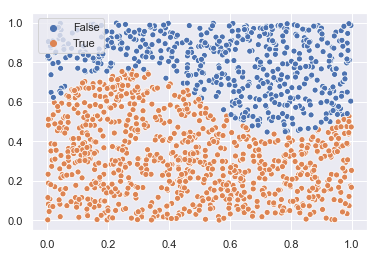

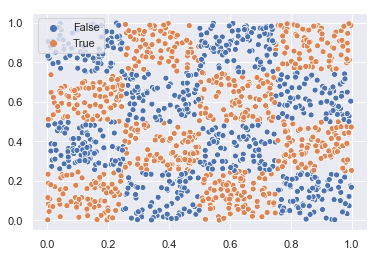

3397


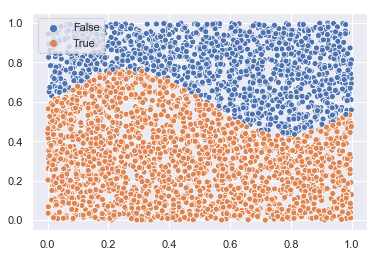

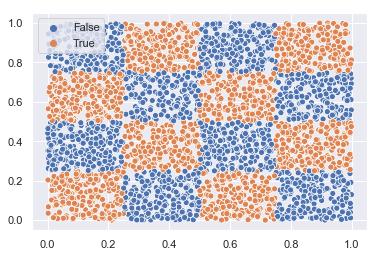

6839


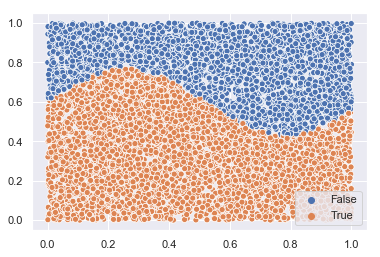

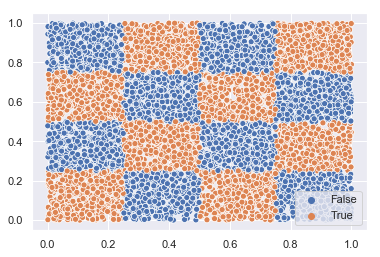

7187


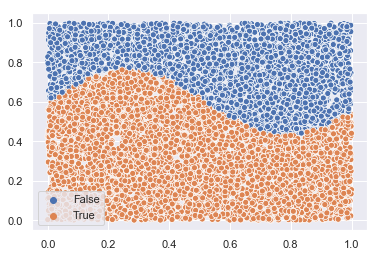

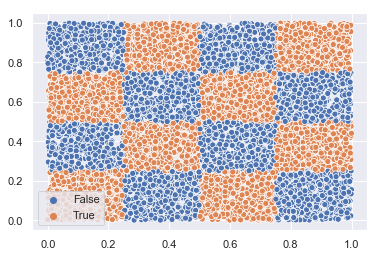

In [3]:
a_data = []
b_data = []
for size in np.random.randint(50, 15000, 5):
    print(size)
    x, y, c_a, c_b = generate_datasets(size)
    df = pd.DataFrame({'x': x, 'y': y, 'c': c_a})
    df.to_csv('A_' + str(size) + '_samples.csv')
    df = pd.DataFrame({'x': x, 'y': y, 'c': c_b})
    df.to_csv('B_' + str(size) + '_samples.csv')

    a_data.append((np.column_stack((x, y)), c_a, 'A'))
    b_data.append((np.column_stack((x, y)), c_b, 'B'))

synthetic_datasets = a_data + b_data

# Дефинирање на класификаторите

In [4]:
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [5]:
clfs = {
    'NN single hidden layer {} neurons'.format(neuron_count): MLPClassifier(
        solver='lbfgs',
        alpha=1e-5,
        hidden_layer_sizes=(neuron_count, ),
        random_state=1)
    for neuron_count in (2,3,11)
}

clfs['NN 10 + 7 neurons in hidden layers'] = MLPClassifier(
    solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10, 7), random_state=1)

clfs['Linear SVM'] = LinearSVC(random_state=1)
clfs['Gaussian SVM'] = SVC(kernel='rbf')

## Помошни функции за класифицирање

In [6]:
def train_classifier(clf, feature_train, labels_train):
    clf.fit(feature_train, labels_train)


def predict_labels(clf, features):
    return (clf.predict(features))

# Тренирање и тестирање на секој класификатор над синтетичките множества
Со користиње на 0.77/0.33 train/test split

In [7]:
scores = {}

for (x, y, data) in synthetic_datasets:
    X_train, X_test, y_train, y_test = train_test_split(
        x, y, test_size=0.33, random_state=42)

    for k, v in clfs.items():
        train_classifier(v, X_train, y_train)
        pred = predict_labels(v, X_test)
        scores['{}: {} {} samples'.format(data, k,
                                          X_train.shape[0])] = accuracy_score(
                                              y_test, pred)

In [8]:
def plot_scores(scores):
    df = pd.DataFrame.from_dict(scores, orient='index', columns=['Score'])

    df.plot(
        kind='bar',
        ylim=(min(df.Score) - 0.05, 1.0),
        figsize=(15, 8),
        align='center',
        colormap="Accent")
    plt.xticks(np.arange(len(scores)), df.index)
    plt.ylabel('Accuracy Score')
    plt.title('Distribution by Classifier')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

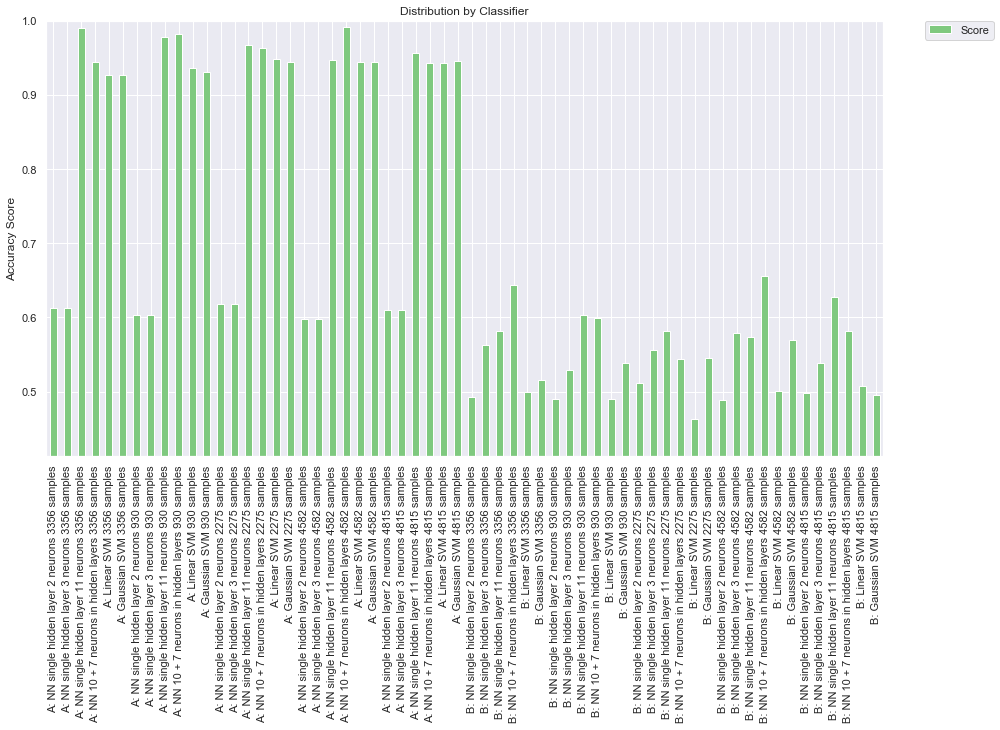

In [9]:
plot_scores(scores)

- Сите класификатори се значително подобри во множествата генерирани со синусната функција
- Невронските мрежи со 1 скриен слој и мал број на неврони се значително полоши од останатите класификатори (во некои случаи се полоши и од random guess)
- Невронската мрежа со поголем број на неврони, како и невронската мрежа со 2 скриени слоја се забележително подобри од SVM

# Ирис податочно множество

In [10]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score
iris = datasets.load_iris()

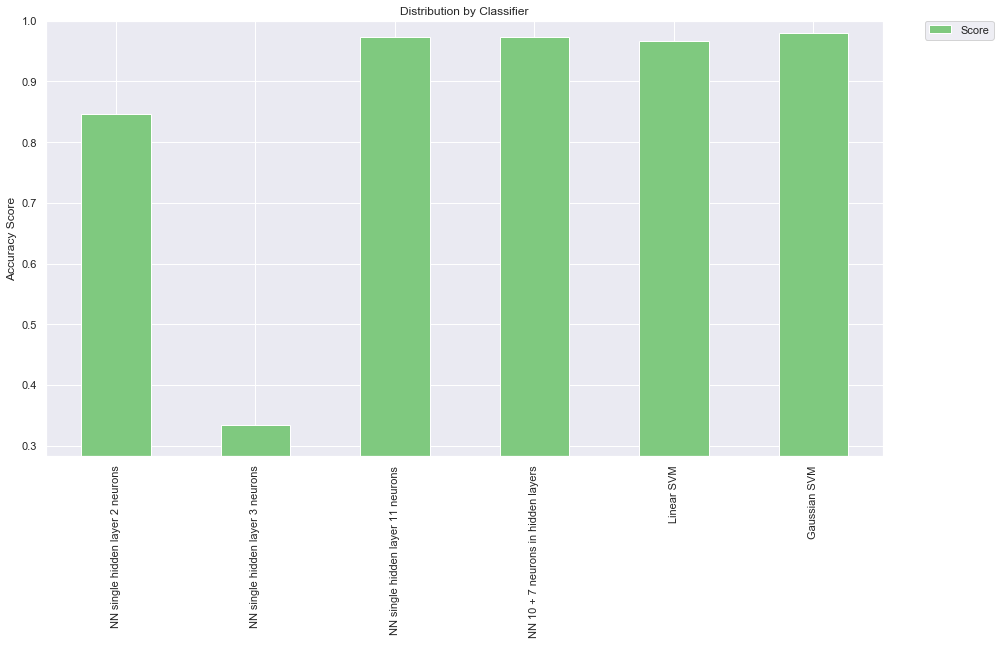

In [11]:
scores = {}
for k, v in clfs.items():
    cv_scores = cross_val_score(v, iris.data, iris.target, cv=10)
    scores[k] = cv_scores.mean()

plot_scores(scores)

- Тука резултатите се слични како и во претходниот експеримент, со таа разлика што невронските мрежи со повеќе неврони и SVM класификаторите немаат значителна разлика во точност

# Seismic bumps податочно множество

In [12]:
from scipy.io import arff

data = arff.loadarff('seismic-bumps.arff.arff')
df = pd.DataFrame(data[0])

df.head()

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
0,b'a',b'a',b'N',15180.0,48.0,-72.0,-72.0,b'a',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0'
1,b'a',b'a',b'N',14720.0,33.0,-70.0,-79.0,b'a',1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2000.0,2000.0,b'0'
2,b'a',b'a',b'N',8050.0,30.0,-81.0,-78.0,b'a',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0'
3,b'a',b'a',b'N',28820.0,171.0,-23.0,40.0,b'a',1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3000.0,3000.0,b'0'
4,b'a',b'a',b'N',12640.0,57.0,-63.0,-52.0,b'a',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0'


In [13]:
x = df[df.columns[3:-1]].drop(['ghazard'], axis=1)
y = df[df.columns[-1]]
y = pd.to_numeric(y)

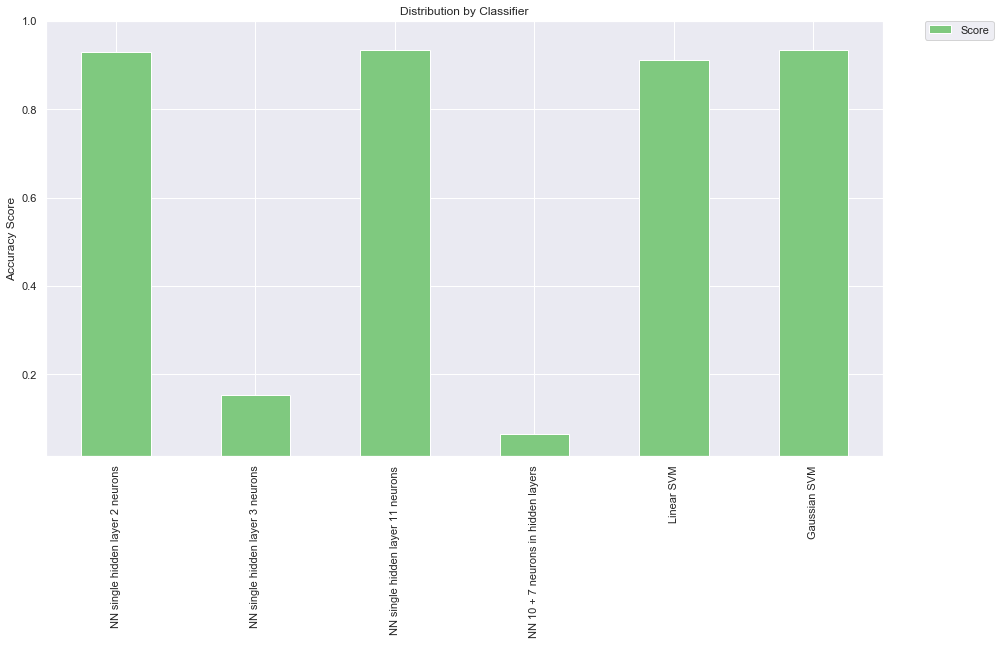

In [14]:
scores = {}
for k, v in clfs.items():
    cv_scores = cross_val_score(v, x, y, cv=10)
    scores[k] = cv_scores.mean()

plot_scores(scores)

- Во ова множество невронската мрежа со 2 неврони и невронската мрежа со 11 неврони во скриениот слој даваат слични резултати со SVM

# Letter Recognition податочно множество

In [15]:
df = pd.read_csv('letter-recognition.data', names=['C'] + list(range(1, 17)))
df.head()

,C,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [16]:
x = df[df.columns[1:]]
y = df[df.columns[0]]

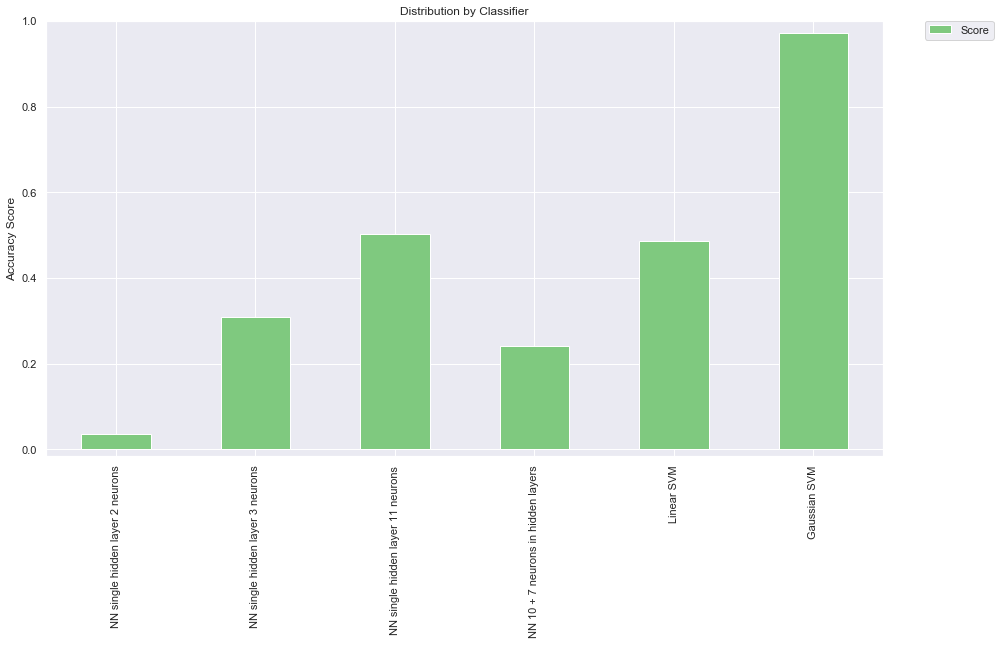

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=1 / 3, random_state=42)

scores = {}

for k, v in clfs.items():
    train_classifier(v, X_train, y_train)
    pred = predict_labels(v, X_test)
    scores[k] = accuracy_score(y_test, pred)

plot_scores(scores)

- Во ова податочно множество единствен класификатор кој дава задоволителни резултати е SVM со гаусов кернел